In [198]:
%matplotlib inline
import os
import matplotlib.cm as cm
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import matplotlib
import h5py
import array

In [123]:
# preds
#f = open("/groups/turaga/home/singhc/evaluation/out/fibsem5/square/100.dat")
f = open("/groups/turaga/home/singhc/evaluation/out/fibsem5_0-10-150/watershed/3_99.out")
pred = array.array("I")
pred.fromfile(f, 432*432*432)
f.close()

In [131]:
predArr = np.array(pred,order='C')
print 'max:',np.max(predArr)
print 'min:',np.min(predArr)

max: 283994
min: 0


In [135]:
predNew = predArr.reshape((432,432,432)).transpose((0,1,2))

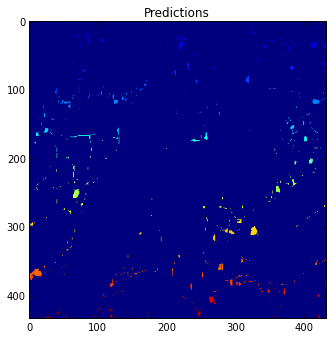

In [136]:
#display(data_set, label_set, label_set, im_size=520)
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax1 = fig.add_subplot(1,3,1)

fig.subplots_adjust(left=0.2, bottom=0.25)
depth0 = 0
zoom0 = 250

im_ = np.zeros((432,432)).astype(np.int)
im_[:,:]=predNew[:,:,0]
im3 = ax1.imshow(im_)
ax1.set_title('Predictions')
plt.show()

In [85]:
pred[0:10]

array('I', [1L, 1L, 1L, 1L, 1L, 1L, 2L, 3L, 4L, 4L])

In [139]:
hdf5_aff_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_aff.h5'
hdf5_pred_file = '/tier2/turaga/turagas/research/pygt_models/fibsem5/test_out_0.h5' #'',0,2,3,4,6

hdf5_aff = h5py.File(hdf5_pred_file, 'r')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]],dtype='float32').flatten()

(0, 0.0002)

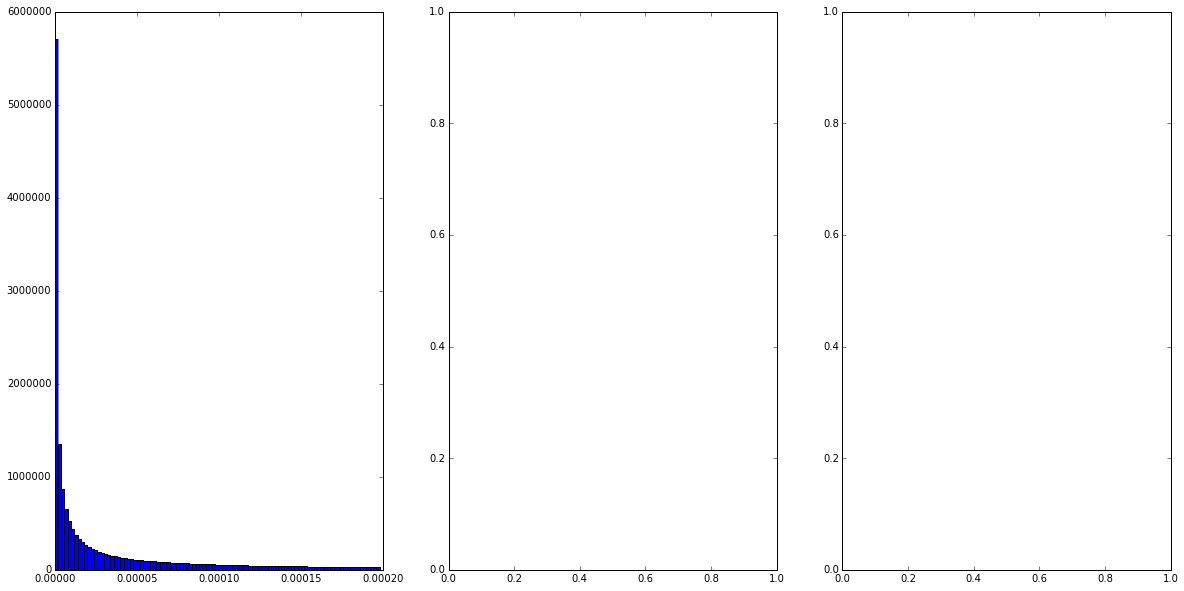

In [175]:
fig = plt.figure(figsize=(20,10))
ax1,ax2,ax3 = fig.add_subplot(1,3,1),fig.add_subplot(1,3,2),fig.add_subplot(1,3,3)
ax1.hist(aff, bins=[.000002*i for i in range(0,100)])
ax1.set_xlim([0,.0002])


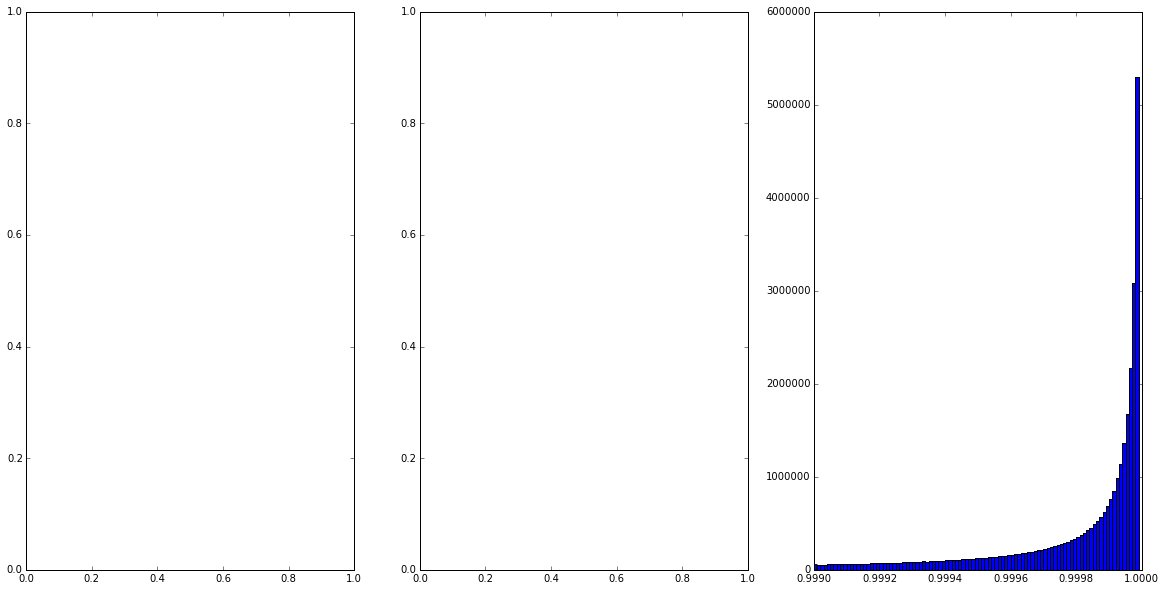

In [172]:
fig = plt.figure(figsize=(20,10))
ax1,ax2,ax3 = fig.add_subplot(1,3,1),fig.add_subplot(1,3,2),fig.add_subplot(1,3,3)
ax3.hist(aff, bins=[1-.00001*(100-i) for i in range(0,100)])
ax3.set_xlim([.999,1])
plt.show()

In [246]:
#f = open("/groups/turaga/home/singhc/evaluation/out/fibsem5_0-10-150/lowhigh/vout.0.000010.0.999999.out")
f = open("/groups/turaga/home/singhc/evaluation/out/fibsem5_0-10-150/lowhigh/vout.-1.2.out")
pred = array.array("I")
pred.fromfile(f, 432*432*432)
pred = np.array(pred).reshape((432,432,432))
print 'pred.shape:',pred.shape
print 'max:',np.max(pred)
print 'min:',np.min(pred)
f.close()

pred.shape: (432, 432, 432)
max: 1230812
min: 1


In [203]:
cmap = matplotlib.colors.ListedColormap(np.vstack(((0,0,0),np.random.rand(255000,3))))

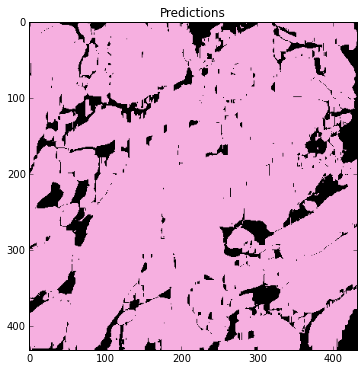

In [258]:
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax1 = fig.add_subplot(1,3,1)
seg = np.zeros((432,432)).astype(np.int)
seg[:,:]=pred[:,:,1]

im3 = ax1.imshow(seg==14,cmap=cmap)
ax1.set_title('Predictions')
plt.show()

In [257]:
np.sum(pred<=14)

71355222

In [229]:
432**3

80621568

In [193]:
hdf5_gt_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_gt = h5py.File(hdf5_gt_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]],dtype='uint32')
np.max(gt)

4446

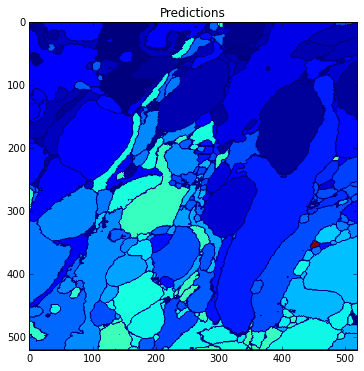

In [259]:
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax1 = fig.add_subplot(1,3,1)
im_ = np.zeros((520,520)).astype(np.int)
im_[:,:]=gt[:,:,433]
im3 = ax1.imshow(im_)
ax1.set_title('Predictions')
plt.show()